In [3]:
# Intro to Machine Learning  CS 4347 Chichi Christine Nov, 2019
import pandas as pd
import urllib
from sklearn.model_selection import train_test_split
import os
import numpy as np
from operator import itemgetter
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score

# requirements : 
#     recommended platform : ubuntu
#     python == 3.7
#     pip install pandas
#     pip install numpy
#     pip install sklearn
#     pip install seaborn
#     pip install matplotlib
%matplotlib inline

# DATASET
Data Source
    
    https://archive.ics.uci.edu/ml/datasets/Skin+Segmentation
    
    Source:
    Rajen Bhatt, Abhinav Dhall, rajen.bhatt '@' gmail.com, IIT Delhi.
    
    Data Set Information:

        The skin dataset is collected by randomly sampling B,G,R values from face images of various age groups (young, middle, and old), race groups (white, black, and asian), and genders obtained from FERET database and PAL database. Total learning sample size is 245057; out of which 50859 is the skin samples and 194198 is non-skin samples.
        
    Attribute Information:

        This dataset is of the dimension 245057 * 4 where first three columns are B,G,R (x1,x2, and x3 features) values and fourth column is of the class labels (decision variable y).
        
    Relevant Papers:


1. Rajen B. Bhatt, Gaurav Sharma, Abhinav Dhall, Santanu Chaudhury, â€œEfficient skin region segmentation using low complexity fuzzy decision tree modelâ€, IEEE-INDICON 2009, Dec 16-18, Ahmedabad, India, pp. 1-4.
        2. Abhinav Dhall, Gaurav Sharma, Rajen Bhatt, Ghulam Mohiuddin Khan, â€œAdaptive Digital Makeupâ€, in Proc. of International Symposium on Visual Computing (ISVC) 2009, Nov. 30 â€“ Dec. 02, Las Vegas, Nevada, USA, Lecture Notes in Computer Science, Vol. 5876, pp. 728-736.



        Citation Request:

        Rajen Bhatt, Abhinav Dhall, 'Skin Segmentation Dataset', UCI Machine Learning Repository


    

### DOWNLOAD DATASET
    Direct Link : https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt

#### DOWNLOAD USING PYTHON

In [4]:
if not os.path.exists('./Skin_NonSkin.txt'):
    url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/00229/Skin_NonSkin.txt'
    urllib.request.urlretrieve(url,'./Skin_NonSkin.txt')

#### Read using pandas

In [4]:
df = pd.read_csv('Skin_NonSkin.txt', sep='\t',names =['B','G','R','skin'])
df.head()

,B,G,R,skin
0,74,85,123,1
1,73,84,122,1
2,72,83,121,1
3,70,81,119,1
4,70,81,119,1


#### Check Missing values

In [5]:
# NO MISSING VALUES
df.isna().sum()

B       0
G       0
R       0
skin    0
dtype: int64

### Standardize dataset

In [6]:
feature = df[df.columns[~df.columns.isin(['skin'])]] #Except Label
label = (df[['skin']] == 1)*1 #Converting to 0 and 1 (this col has values 1 and 2)
feature = feature / 255. #Pixel values range from 0-255 converting between 0-1

In [7]:
feature.head()

,B,G,R
0,0.290196,0.333333,0.482353
1,0.286275,0.329412,0.478431
2,0.282353,0.325490,0.474510
3,0.274510,0.317647,0.466667
4,0.274510,0.317647,0.466667


In [8]:
label.head()

,skin
0,1
1,1
2,1
3,1
4,1


### Explore your data
    Please try to understand the nature of data

In [7]:
alldf = pd.concat([feature,label], sort=True, axis=1)
alldf

,B,G,R,skin
0,0.290196,0.333333,0.482353,1
1,0.286275,0.329412,0.478431,1
2,0.282353,0.325490,0.474510,1
3,0.274510,0.317647,0.466667,1
4,0.274510,0.317647,0.466667,1
5,0.270588,0.313725,0.462745,1
6,0.274510,0.317647,0.466667,1
7,0.274510,0.317647,0.466667,1
8,0.298039,0.341176,0.490196,1
9,0.298039,0.341176,0.490196,1


In [10]:
sample = alldf.sample(1000)

In [11]:
onlybgr = sample[sample.columns[~sample.columns.isin(['skin'])]]

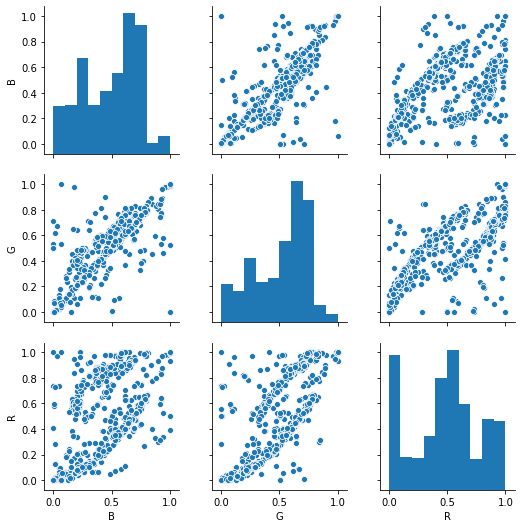

In [12]:
sns.pairplot(onlybgr)

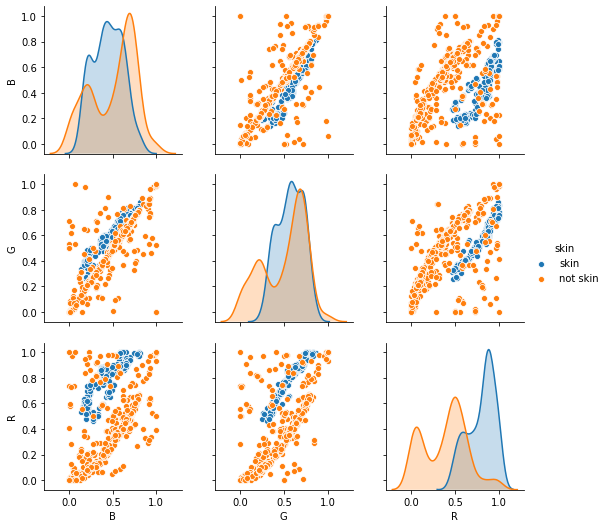

In [14]:
sample_ = sample.copy()
sample_['skin'] = sample.skin.apply(lambda x:{1:'skin',0:'not skin'}.get(x))
sns.pairplot(sample_, hue="skin")
# sample

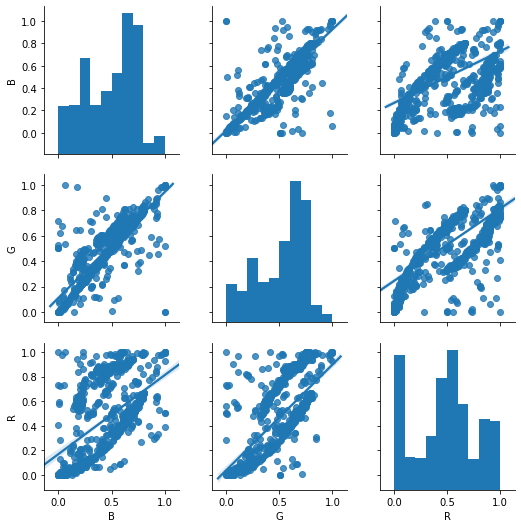

In [15]:
sns.pairplot(onlybgr, kind="reg")

In [17]:
# Lets see how many 0s and 1s
(label == 0).skin.sum(),(label == 1).skin.sum()

(194198, 50859)

## SPLIT DATA INTO 5 CROSS - VALIDATION

In [8]:
x = feature.values
y = label.values

In [9]:
# We will keep fix test and take 5 cross validation set
# so we will have five different data set
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.20, random_state=1)

In [10]:
#Lets see the size of xtrain, xtest
len(xtrain),len(xtest)

(196045, 49012)

In [11]:
# 5 Fold Split
# First merge xtrain and ytrain so that we can easily divide into 5 chunks

data = np.concatenate([xtrain,ytrain],axis = 1)
# Observe the shape of array
xtrain.shape,ytrain.shape,data.shape

((196045, 3), (196045, 1), (196045, 4))

In [12]:
# Divide our data to 5 chunks
chunks = np.split(data,5)

In [13]:
datadict = {'fold1':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold2':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold3':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}}, 
            'fold4':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},
            'fold5':{'train':{'x':None,'y':None},'val':{'x':None,'y':None},'test':{'x':xtest,'y':ytest}},}

In [14]:
for i in range(5):
    datadict['fold'+str(i+1)]['val']['x'] = chunks[i][:,0:3]
    datadict['fold'+str(i+1)]['val']['y'] = chunks[i][:,3:4]
    
    idx = list(set(range(5))-set([i]))
    X = np.concatenate(itemgetter(*idx)(chunks),0)
    datadict['fold'+str(i+1)]['train']['x'] = X[:,0:3]
    datadict['fold'+str(i+1)]['train']['y'] = X[:,3:4]
    

In [15]:
def writepickle(data, filename):
    with open(filename, 'wb') as f:
        pickle.dump(data, f)

def readpickle(filename):
    with open(filename, 'rb') as f:
        data = pickle.load(f)
    return data

In [16]:
writepickle(datadict,'data.pkl')

## Now You Can Read This Pickle File And Use In Your Project

In [17]:
data = readpickle('data.pkl')

## How to access data
    Example : Access fold1 data

In [18]:
fold1 = data['fold1']
fold1_train = fold1['train']
fold1_val = fold1['val']
fold1_test = fold1['test']

xtrain, ytrain = fold1_train['x'],fold1_train['y']
xval, yval = fold1_val['x'], fold1_val['y']
xtest, ytest = fold1_test['x'],fold1_test['y']

In [30]:
xtrain.shape, ytrain.shape

((156836, 3), (156836, 1))

In [29]:
xval.shape, yval.shape

((39209, 3), (39209, 1))

In [31]:
xtest.shape,ytest.shape

((49012, 3), (49012, 1))

[[28667  2485]
 [  289  7768]]
Accuracy: 0.9293


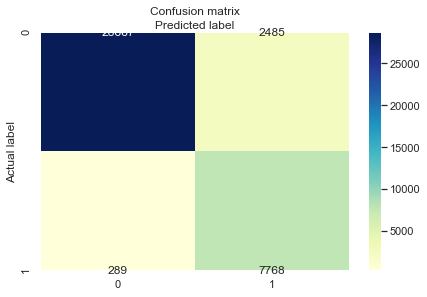

In [30]:
# Fold 1 val data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xval, yval.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xval)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(yval, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, fmt="g",cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accuv1 = metrics.accuracy_score(yval, y_pred)
print("Accuracy: "+"{:.4f}".format(accuv1))

[[35557  3170]
 [  343  9942]]
Accuracy: 0.9283


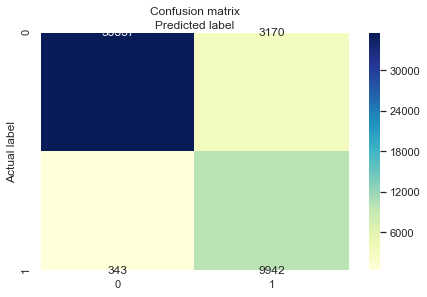

In [29]:
# Fold 1  test data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xtrain, ytrain.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xtest)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, fmt="g", cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accut1 = metrics.accuracy_score(ytest, y_pred)
print("Accuracy: "+"{:.4f}".format(accut1))


In [33]:
fold2 = data['fold2']
fold2_train = fold2['train']
fold2_val = fold2['val']
fold2_test = fold2['test']

xtrain, ytrain = fold2_train['x'],fold2_train['y']
xval, yval = fold2_val['x'], fold2_val['y']
xtest, ytest = fold2_test['x'],fold2_test['y']

[[28560  2487]
 [  241  7921]]
Accuracy: 0.9304


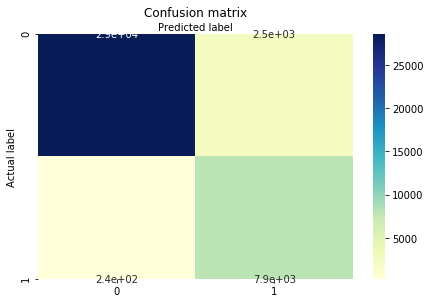

In [34]:
# Fold 2 val data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xval, yval.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xval)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(yval, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accuv2 = metrics.accuracy_score(yval, y_pred)
print("Accuracy: "+"{:.4f}".format(accuv2))

[[35556  3171]
 [  362  9923]]
Accuracy: 0.9279


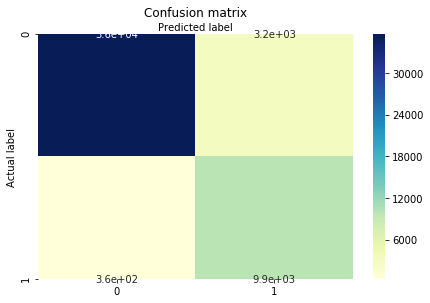

In [35]:
# Fold 2  test data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xtrain, ytrain.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xtest)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accut2 = metrics.accuracy_score(ytest, y_pred)
print("Accuracy: "+"{:.4f}".format(accut2))


In [63]:
fold3 = data['fold3']
fold3_train = fold3['train']
fold3_val = fold3['val']
fold3_test = fold3['test']

xtrain, ytrain = fold3_train['x'],fold3_train['y']
xval, yval = fold3_val['x'], fold3_val['y']
xtest, ytest = fold3_test['x'],fold3_test['y']

[[28623  2431]
 [  264  7891]]
Accuracy: 0.9313


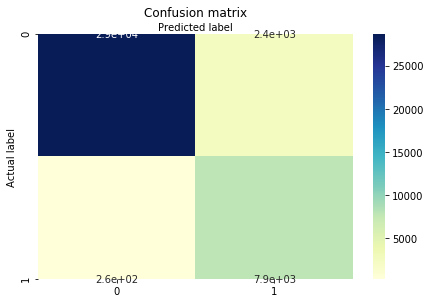

In [64]:
# Fold 3 val data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xval, yval.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xval)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(yval, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accuv3 = metrics.accuracy_score(yval, y_pred)
print("Accuracy: "+"{:.4f}".format(accuv3))

[[35555  3172]
 [  360  9925]]
Accuracy: 0.9279
Precision: 0.9279
Recall: 0.9279
F-beta score: 0.9279


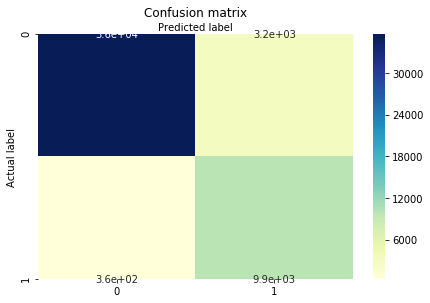

In [76]:
# Fold 3  test data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xtrain, ytrain.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xtest)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accut3 = metrics.accuracy_score(ytest, y_pred)
print("Accuracy: "+"{:.4f}".format(accut3))
prect3 = precision_score(ytest, y_pred, average='micro')
print("Precision: "+"{:.4f}".format(prect3))
rect3 = recall_score(ytest, y_pred, average='micro')
print("Recall: "+"{:.4f}".format(rect3))
fscoret3 = fbeta_score(ytest, y_pred, average='micro', beta=1)
print("F-beta score: "+"{:.4f}".format(fscoret3))

In [77]:
fold4 = data['fold4']
fold4_train = fold4['train']
fold4_val = fold4['val']
fold4_test = fold4['test']

xtrain, ytrain = fold4_train['x'],fold4_train['y']
xval, yval = fold4_val['x'], fold4_val['y']
xtest, ytest = fold4_test['x'],fold4_test['y']

[[28584  2557]
 [  319  7749]]
Accuracy: 0.9266


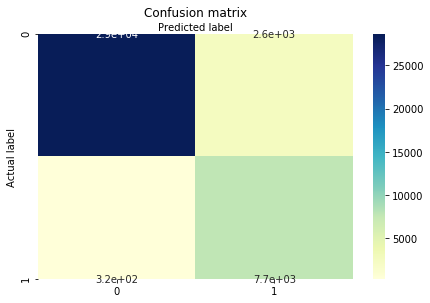

In [78]:
# Fold 4 val data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xval, yval.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xval)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(yval, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accuv4 = metrics.accuracy_score(yval, y_pred)
print("Accuracy: "+"{:.4f}".format(accuv4))

[[35560  3167]
 [  334  9951]]
Accuracy: 0.9286
Precision: 0.9286
Recall: 0.9286
F-beta score: 0.9286


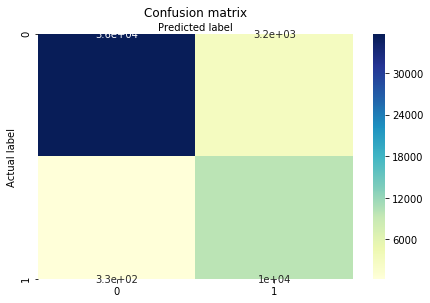

In [79]:
# Fold 4  test data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xtrain, ytrain.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xtest)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accut4 = metrics.accuracy_score(ytest, y_pred)
print("Accuracy: "+"{:.4f}".format(accut4))
prect4 = precision_score(ytest, y_pred, average='micro')
print("Precision: "+"{:.4f}".format(prect4))
rect4 = recall_score(ytest, y_pred, average='micro')
print("Recall: "+"{:.4f}".format(rect4))
fscoret4 = fbeta_score(ytest, y_pred, average='micro', beta=1)
print("F-beta score: "+"{:.4f}".format(fscoret4))

In [80]:
fold5 = data['fold5']
fold5_train = fold5['train']
fold5_val = fold5['val']
fold5_test = fold5['test']

xtrain, ytrain = fold5_train['x'],fold5_train['y']
xval, yval = fold5_val['x'], fold5_val['y']
xtest, ytest = fold5_test['x'],fold5_test['y']

[[28641  2436]
 [  295  7837]]
Accuracy: 0.9303


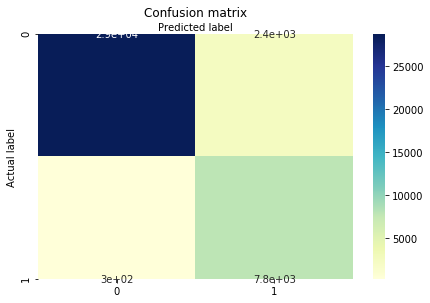

In [81]:
# Fold 5 val data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xval, yval.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xval)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(yval, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accuv5 = metrics.accuracy_score(yval, y_pred)
print("Accuracy: "+"{:.4f}".format(accuv5))

[[35561  3166]
 [  354  9931]]
Accuracy: 0.9282


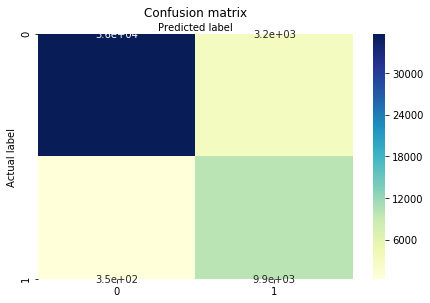

In [83]:
# Fold 5  test data
# Instantiate a Logistic Regression object for split dataset 80-20, train-test
lr = LogisticRegression(solver='liblinear', class_weight='balanced')

lr.fit(xtrain, ytrain.ravel())
# We will compare this vector of predictions to the actual values to determine the model performance.
y_pred = lr.predict(xtest)
# Build the confusion matrix.
confusion_matrix = metrics.confusion_matrix(ytest, y_pred)
class_names=[0,1] # name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# The heatmap requires that we pass in a dataframe as the argument
sns.heatmap(pd.DataFrame(confusion_matrix), annot=True, cmap="YlGnBu")

# Configure the heatmap parameters
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
print(confusion_matrix)

accut5 = metrics.accuracy_score(ytest, y_pred)
print("Accuracy: "+"{:.4f}".format(accut5))

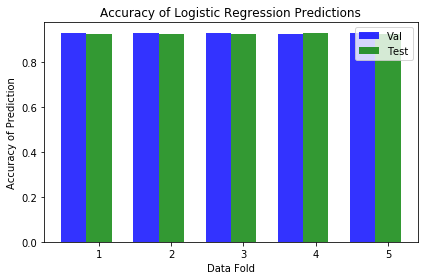

In [84]:
# data to plot
n_groups = 5
val = (accuv1, accuv2, accuv3, accuv4, accuv5)
test = (accut1, accut2, accut3, accut4, accut5)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, val, bar_width,
alpha=opacity,
color='b',
label='Val')

rects2 = plt.bar(index + bar_width, test, bar_width,
alpha=opacity,
color='g',
label='Test')

plt.xlabel('Data Fold')
plt.ylabel('Accuracy of Prediction')
plt.title('Accuracy of Logistic Regression Predictions')
plt.xticks(index + bar_width, ('1', '2', '3', '4', '5'))
plt.legend()

plt.tight_layout()
plt.show()

<h1 style="color:green">!!!!!!!!!! NOTES !!!!!!!!!!</h1>

    This walkthrough is just to make your life easier
    If you want to use your own ways of doing data processing it is fine
    You can continue your assignment right-away from below or setup 
    a project like assignment 1. You can use any library you want

<h1 style="color:red">!!!!!!!!!! WARNING !!!!!!!!!!</h1>

    1. DO NOT SUBMIT .DOCX FILE
    2. NAME YOUR FILE IN FOLLOWING MANNER net_id_homework_2.pdf
    3. SUBMIT BOTH ASSIGNMENT(OPENED) AND YOUR DROPBOX
    4. YOUR REPORT SHOULD CONTAIN LINK TO YOUR GITHUB 
    5. ADD COMMENTS TO INCREASE READIBILITY IN YOUR CODE

### Now use above dataset to complete following work

# Assignment 2
    You can use any libraires you want, but choose python as your platform
    
    1. Implement Logistic Regression on this 5 fold data
    2. Report Test Accuracy, Val Accuracy on each fold
       Follow following format
       ________________________
       
            |  ACCURACY   
       FOLD | VAL | TEST  
       ________________________
            |     |
       1    |  ?? |  ??
       2    |  ?? |  ??
       3    |  ?? |  ??
       4    |  ?? |  ??
       5    |  ?? |  ??
       ________________________
       AVG  |  ?? |  ??
       
    3. Report Visualization
    
    NOTE :  You must submit two things
            First : A pdf report with following explanation
                    - What tools you used and why?
                    - Metrics as explained in (2)
                    - Visualization/Graph
                    - Conclude your experiment
                    - Add a github repo as report

            Second : A github repo
    

# Assignment 2
    You can use any libraires you want, but choose python as your platform
    
    1. Implement Logistic Regression on this 5 fold data
    2. Report Test Accuracy, Val Accuracy on each fold
       Follow following format
       ________________________
       
            |  ACCURACY   
       FOLD | VAL | TEST  
       ________________________
            |     |
       1    |  ?? |  ??
       2    |  ?? |  ??
       3    |  ?? |  ??
       4    |  ?? |  ??
       5    |  ?? |  ??
       ________________________
       AVG  |  ?? |  ??
       
    3. Report Visualization
    
    NOTE :  You must submit two things
            First : A pdf report with following explanation
                    - What tools you used and why?
                    - Metrics as explained in (2)
                    - Visualization/Graph
                    - Conclude your experiment
                    - Add a github repo as report

            Second : A github repo
    